In [7]:
import numpy as np
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

    
def plot_three_images(img1: np.array, img2: np.array, img3: np.array):
    fig, ax = plt.subplots(1, 3, figsize=(21, 7))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    ax[2].imshow(img3, cmap='gray');


def add_padding(img, width):
    img_with_padding = np.zeros(shape=(
        img.shape[0] + width * 2,  
        img.shape[1] + width * 2
    ))
    
    img_with_padding[width:-width, width:-width] = img
    
    return img_with_padding

blur =(1 / 16.0) * np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]])

edge = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

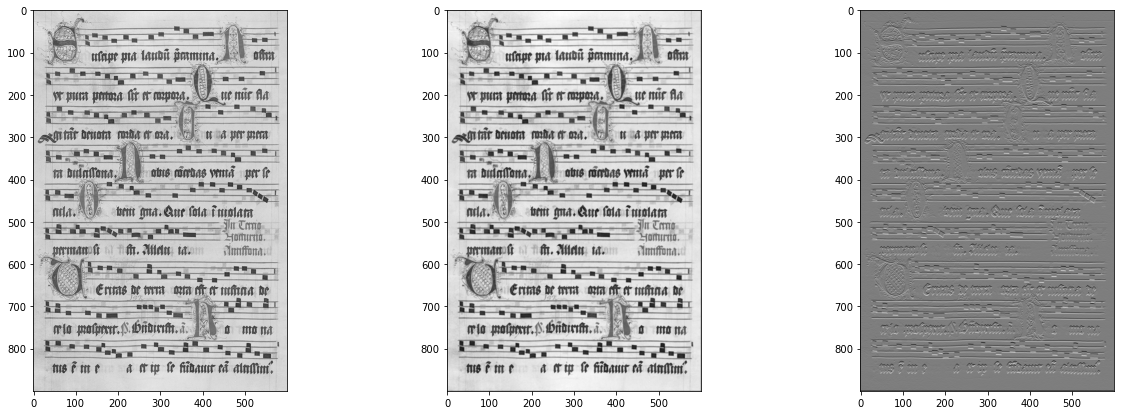

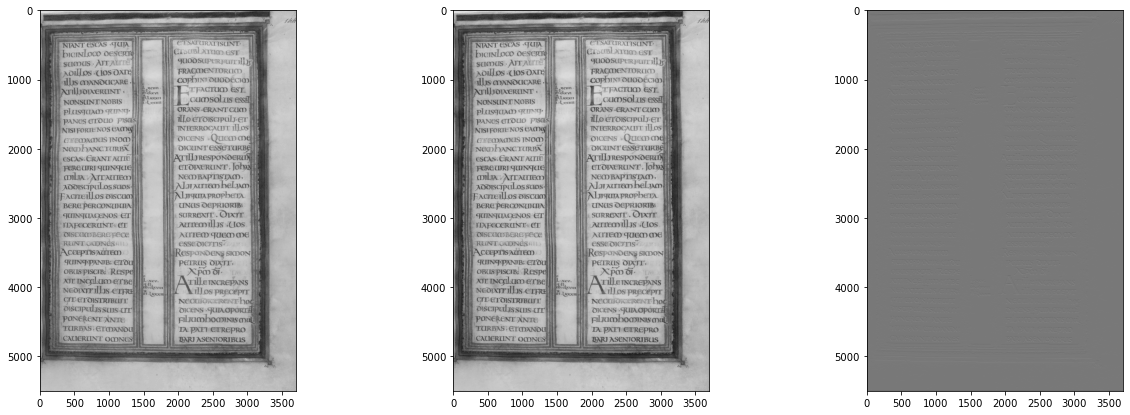

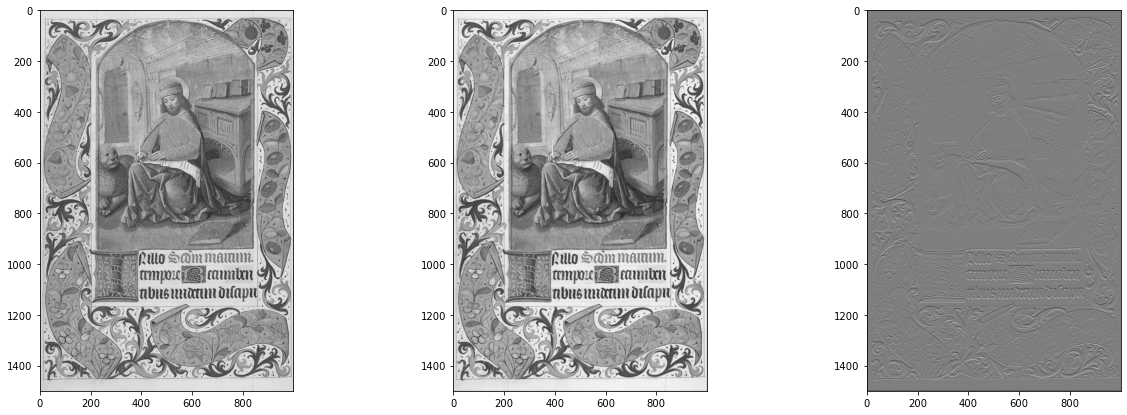

In [8]:


def image_details(img):
    width, height = img.size
    print('size is {wide} x {height}'.format(wide=width, height=height))
    return width, height

def save_image(image, old_name, dir):
    index = old_name.find('.jpg')
    final_string = old_name[:index] + '_resized' + old_name[index:]
    newpath = dir + "/resized_images" 
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    path_to_save = newpath +"/" + final_string
    image.save(path_to_save)
    print("image saved: " + path_to_save)

def main():
    dir = os.getcwd()
    try:
        #assuming this file is one directory upper than images
        directory = os.fsencode(dir + '/images' )
        for file in os.listdir(directory):
            filename = os.fsdecode(file)
            if filename.endswith(".jpg"):
                image = Image.open(dir + '/images/' + filename)
                image = ImageOps.grayscale(image)
                image_blurred = convolve(img=add_padding(np.array(image), blur.shape[0]//2), kernel=blur)
                image_edge_detected = convolve(img=add_padding(np.array(image), edge.shape[0]//2), kernel=edge)
                plot_three_images(
                    img1=image,
                    img2=image_blurred,
                    img3=image_edge_detected
                )
                
            else:
                continue
                
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()    


In [9]:
def convolve(img, kernel):
    k = kernel.shape[0]
    convolved_img = np.zeros(shape=(img.shape[0]-k+1 , img.shape[1]-k+1))
    
    for i in range(img.shape[0]-k+1):
        for j in range(img.shape[1]-k+1):
            mat = img[i:i+k, j:j+k]
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img